# Simulation study 
**proving, that cross-sectional normative models are good enough for longitudinal data analysis**

In [18]:
#%run simulation_study_cycle.py
!python /home/barbora/Documents/Projects/Normative_Models/ESO/code/simulation_study_cycle.py 0 'all'

/home/barbora/Instalacky/yes/envs/PCN/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
Random seed 42 has been set.
0
lh_G&S_frontomargin_thickness
Loading data ...
Prediction by model  1 of 1
Loading data ...
Prediction by model  1 of 1
Loading data ...
Prediction by model  1 of 1
Loading data ...
Prediction by model  1 of 1
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
1
Running IDP 0 lh_G&S_frontomargin_thickness :
Some sites missing from the training data. Adapting model
Loading data ...
Prediction by model  1 of 1
Evaluating the model ...
Evaluations Writing outputs ...
Writing outputs ...
Loading data ...
Prediction by model  1 of 1
Evaluating the model ...
Evaluations Writing outputs ...
Writing outputs .

In [29]:
pk = pd.read_table(os.path.join(simulations_dir,'temp.csv'), sep=' ', index_col=0)

<AxesSubplot:ylabel='Density'>

/home/barbora/Instalacky/yes/envs/PCN/lib/python3.9/site-packages/IPython/core/pylabtools.py:137: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


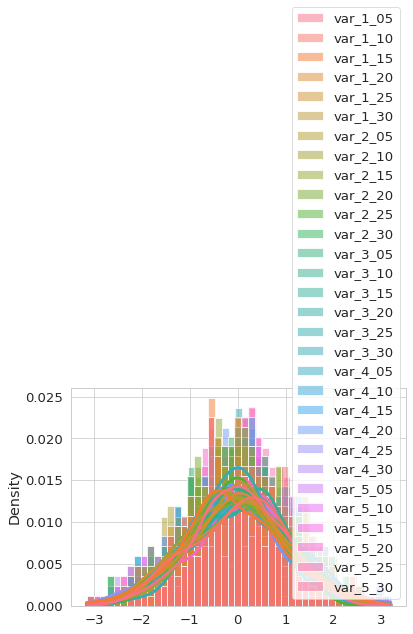

In [48]:
sns.histplot(df_pat_z, stat='density', kde=True, label='', color = 'red')
sns.histplot(df_pat_A_z, stat='density', kde=True, label='', color='blue')

<AxesSubplot:>

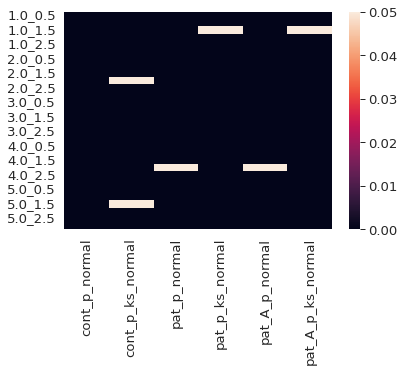

In [46]:
sns.heatmap(pk[['cont_p_normal','cont_p_ks_normal', 'pat_p_normal','pat_p_ks_normal', 'pat_A_p_normal','pat_A_p_ks_normal']]<0.05, vmin=0, vmax=0.05)

<AxesSubplot:>

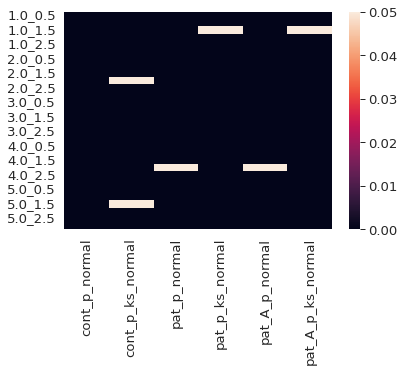

In [47]:
sns.heatmap(data[['cont_p_normal','cont_p_ks_normal', 'pat_p_normal','pat_p_ks_normal', 'pat_A_p_normal','pat_A_p_ks_normal']]<0.05, vmin=0, vmax=0.05)

### **Analysis of the simulation results**

In [19]:
# Loading packages
import os, glob, pickle, time, sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pcntoolkit.util.utils import create_design_matrix
from scipy.stats import ttest_1samp

# custom functions
code_dir = ('/home/barbora/Documents/Projects/Normative_Models/ESO/code')
os.chdir(code_dir)
import clinics_desc_functions as custom

custom.set_seed(seed=42)

project_dir = ('/home/barbora/Documents/Projects/Normative_Models')
simulations_dir = '/home/barbora/Documents/Projects/Normative_Models/ESO/simulations'
models_dir = '/home/barbora/Documents/Projects/Normative_Models/ESO/braincharts/models/lifespan_57K_82sites/'
models_pretrained_all = '/home/barbora/Documents/Projects/Normative_Models/ESO/braincharts/'
paper_im_dir = os.path.join(project_dir,'ESO', 'draft', 'img')

model_name, site_names, site_ids_tr, idp_ids = custom.pretrained_ini(sites=82)
thick_id = [i for i in idp_ids if 'thickness' in i]

Random seed 42 has been set.


In [6]:
sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})

# Plot the responses for different events and regions
sim_to_analyze = '50'
for name in glob.glob(os.path.join(simulations_dir, '*_'+sim_to_analyze+'.csv'))[0:3]:

    print(name.split('/')[-1])

    pk = pd.read_table(os.path.join(simulations_dir,name), sep=' ', index_col=0)

    fig, ax = plt.subplots(2,3, figsize=(18,8))

    sns.kdeplot(pk['pat_z_mean'], color='blue', label='Z', ax = ax[0,0])
    sns.kdeplot(pk['pat_A_z_mean'], color='green', label='A Z', ax = ax[0,0])
    ax[0,0].set_title('Mean')

    sns.heatmap(pk[['pat_z_mean', 'pat_A_z_mean']], ax = ax[0,1], center=0)

    sns.heatmap(pk[['pat_z_mean_p', 'pat_A_z_mean_p']], ax = ax[0,2], vmax = 0.05, vmin=0)


    sns.kdeplot(pk['pat_z_var'], color='blue', label='Z', ax = ax[1,0])
    sns.kdeplot(pk['pat_A_z_var'], color='green', label='A Z', ax = ax[1,0])
    ax[1,0].set_title('Variance')
    ax[1,0].legend()

    sns.heatmap(pk[['pat_z_var', 'pat_A_z_var']], ax = ax[1,1], center=1)

    sns.heatmap(pk[['pat_z_var_p', 'pat_A_z_var_p']], ax = ax[1,2], vmax = 0.05, vmin=0)

    fig.suptitle(name.split('simulations_')[1].split('.csv')[0].replace('_',' '), fontsize=16)

    plt.tight_layout()
    plt.savefig(os.path.join(simulations_dir,'img',sim_to_analyze, name.split('simulations_')[1].split('.csv')[0].replace('_',' ')+'.png'), dpi=300)

    plt.close()

simulations_lh_G_insular_short_thickness_50.csv
simulations_lh_Lat_Fis-post_thickness_50.csv
simulations_rh_S_orbital_lateral_thickness_50.csv


### **Original development**
- from here down

In [7]:
# Loading packages
import os, glob, pickle, time, sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pcntoolkit.util.utils import create_design_matrix
from scipy.stats import ttest_1samp

# custom functions
code_dir = ('/home/barbora/Documents/Projects/Normative_Models/ESO/code')
os.chdir(code_dir)
import clinics_desc_functions as custom

custom.set_seed(seed=42)

Random seed 42 has been set.


definition of paths to directories

In [8]:
project_dir = ('/home/barbora/Documents/Projects/Normative_Models')
simulations_dir = '/home/barbora/Documents/Projects/Normative_Models/ESO/simulations'
models_dir = '/home/barbora/Documents/Projects/Normative_Models/ESO/braincharts/models/lifespan_57K_82sites/'
models_pretrained_all = '/home/barbora/Documents/Projects/Normative_Models/ESO/braincharts/'
paper_im_dir = os.path.join(project_dir,'ESO', 'draft', 'img')

which IDP are we going to model?

In [9]:
import clinics_desc_functions as custom
# pretrained model
model_name, site_names, site_ids_tr, idp_ids = custom.pretrained_ini()

random_idp = idp_ids[15]#np.random.randint(len(idp_ids), size=1)

# one random model - just trying to get some reasonable coeffitients
model_path = os.path.join(models_dir,random_idp,'Models')

-------------------------------------------------------------------------------------------------------------------

All functions needed for the script
- generate controls data
- generate patients data
- function for plotting of longitudinal data

In [10]:
# Functions neede for the simulation study (will be later transfered to custom --- after debugging)
# Function to generate Subjects
def generate_longitudinal_subjects_template(model_path, random_idp, simulations_dir, no_females = 1000, age='all'):
    """
    generates template and covariance matrix for longitudinal subjects
    template1, template2 = generate_longitudinal_subjects_template(model_path, random_idp, simulations_dir, no_females = 1000)
    
    model_path... path of model with coeffitients
    random_idp... name of random idp
    simulations_dir... path to simulations directory
    no_females... number of females in the population (default = 1000), same nuber will be used for males
    """
    # seed the random number generator
    np.random.seed(42)

    # Create template dataset for V1 and V2
    if age=='all':
        v1_age = np.random.randint(18,60,size=no_females*2)
        v2_age = v1_age+1
    else:
        v1_age = np.ones(no_females*2)*age
        v2_age = v1_age+1

    sex = np.concatenate([np.zeros([no_females]),np.ones([no_females])])
    id = ['c'+str(i) for i in range(1,no_females*2+1)]

    v1_template = pd.DataFrame(np.array([v1_age,sex]).T, columns=['age', 'sex'], index=id)
    v2_template = pd.DataFrame(np.array([v2_age,sex]).T, columns=['age', 'sex'], index=id)

    v1_template['site'] = 'simulation'
    v1_template['sitenum'] = 4223
    v2_template['site'] = 'simulation'
    v2_template['sitenum'] = 4223

    # Deterministic part of the simulation
    # phi(x)*w --> Yhat
    cols_cov = ['age','sex']
    v1_covars = create_design_matrix(v1_template[cols_cov], 
                                site_ids = v1_template['site'],
                                all_sites = site_ids_tr,
                                basis = 'bspline', 
                                xmin = -5, 
                                xmax = 110)

    v2_covars = create_design_matrix(v2_template[cols_cov], 
                                site_ids = v2_template['site'],
                                all_sites = site_ids_tr,
                                basis = 'bspline', 
                                xmin = -5, 
                                xmax = 110)

    os.makedirs(os.path.join(simulations_dir,'V1',random_idp), exist_ok=True)
    os.makedirs(os.path.join(simulations_dir,'V2',random_idp), exist_ok=True)
    v1_fsaveto = os.path.join(simulations_dir,'V1',random_idp,'v1_controls.txt')
    np.savetxt(v1_fsaveto, v1_covars)
    v2_fsaveto = os.path.join(simulations_dir,'V2',random_idp,'v2_controls.txt')
    np.savetxt(v2_fsaveto, v2_covars)

    from temp_func_pcn import predict
    v1_template['Yhat'], v1_s2_orig = predict(v1_fsaveto, respfile = None, alg='blr', model_path=model_path)
    v2_template['Yhat'], v2_s2_orig = predict(v2_fsaveto, respfile = None, alg='blr', model_path=model_path)
    
    return v1_template, v2_template


def add_noise_to_subjects(v1_template, v2_template, model_path, random_idp, var_population = 1, var_noise = 0.5, effect='none', effect_size = 0, effect_var = 0, seed = 42):
    """
    Function will generate brain data based on coeffitiens from chosen model
    v1_template, v2_template = add_noise_to_subjects(template1, template2, model_path, random_idp, var_population = 1, var_noise = 0.5, effect='none', effect_size = 0, effect_var = 0, seed = 42)
    
    template1, template2... templates generated by generate_longitudinal_subjects_template
    model_path... path of model with coeffitients
    var_population... variation in population (default = 1)
    var_noise... variation in noise (default = 0.5)
    effect...   - none (use to generate controls)
                - uniform
                - normal
    effect_size... effect size (default = 0)
    effect_var... effect variation (default = 0)
    seed... seed for random number generator (default = 42)
    """
    from pcntoolkit.normative import estimate, predict, evaluate

    # Adding the position within the population to every individual
    np.random.seed(seed)

    if var_population == 'model':
        with open(os.path.join(model_path, 'NM_0_0_estimate.pkl'), 'rb') as handle:\
            nm = pickle.load(handle) 
        beta, junk1, junk2 = nm.blr._parse_hyps(nm.blr.hyp, v1_covars)        
        v1_template['pop'] = np.random.normal(0, 1/beta, size=v1_template.shape[0])
        beta = 1/beta
    else:
        v1_template['pop'] = np.random.normal(0,var_population,size=v1_template.shape[0])
        beta = var_population + var_noise

    # Adding the effect if there is any (controls vs patients)
    if effect == 'none':
        effect_size = 0
    elif effect == 'normal':
        effect_size = np.random.normal(effect_size, effect_var, size=no_patients)
    elif effect == 'uniform':
        effect_size = effect_size

    v1_template['effect_size'] = effect_size
    v1_template['Yhat_pop'] = v1_template['Yhat'] + v1_template['pop'] + v1_template['effect_size']
    v1_template['noise'] = np.random.normal(0,var_noise,size=v1_template.shape[0])
    v1_template['warped'] = v1_template['Yhat'] + v1_template['pop'] + v1_template['effect_size'] + v1_template['noise']

    v2_template['pop'] = v1_template['pop']
    v2_template['effect_size'] = effect_size
    v2_template['Yhat_pop'] = v2_template['Yhat'] + v2_template['pop'] + v2_template['effect_size']
    v2_template['noise'] = np.random.normal(0,var_noise,size=v2_template.shape[0])
    v2_template['warped'] = v2_template['Yhat'] + v2_template['pop'] + v2_template['effect_size'] + v2_template['noise']


    # Now warping into the original space
    # load the normative model
    with open(os.path.join(model_path, 'NM_0_0_estimate.pkl'), 'rb') as handle:
        nm = pickle.load(handle) 

    # get the warp and warp parameters
    W = nm.blr.warp
    warp_param = nm.blr.hyp[1:nm.blr.warp.get_n_params()+1] 
        
    # first, we warp predictions for the true data and compute evaluation metrics
    v1_template[random_idp] = W.warp_predictions(np.squeeze(v1_template['warped'].to_numpy()), np.squeeze(beta), warp_param)[0]
    v2_template[random_idp] = W.warp_predictions(np.squeeze(v2_template['warped'].to_numpy()), np.squeeze(beta), warp_param)[0]

    return(v1_template, v2_template, beta)


###
# Train_test_split - split across sites, keep 30% as TESTING
###
def run_and_attach(v1_cont, v2_cont, v1_pat, v2_pat, simulations_dir, random_idp):

    from temp_func import pretrained_adapt_controls

    from sklearn.model_selection import StratifiedShuffleSplit
    sss = StratifiedShuffleSplit(n_splits=2, test_size=0.25, random_state=42)
    
    for train, test in sss.split(v1_cont.index,  v1_cont['sex']):

        #iter_dir = isim_dir
        #os.makedirs(iter_dir, exist_ok=True)
        site_ids_te =  sorted(set(v1_pat['site'].to_list()))

        for ivisit in range(1,3):
            if ivisit == 1:
                df_te = v1_pat
                df_tec = v1_cont.iloc[test]
                df_ad = v1_cont.iloc[train]

            elif ivisit == 2:
                df_te = v2_pat
                df_tec = v2_cont.iloc[test]
                df_ad = v1_cont.iloc[train]

            visit_dir = os.path.join(simulations_dir, 'V'+str(ivisit), random_idp)
            os.makedirs(visit_dir, exist_ok=True)
            

            #custom.pretrained_adapt_small(random_idp, site_ids_tr, site_ids_te, model_path, visit_dir, df_ad, df_te)
            pretrained_adapt_controls([random_idp], site_ids_tr, site_ids_te, models_dir, os.path.join(simulations_dir, 'V'+str(ivisit)), df_ad, df_tec, df_te)

            # create textfiles for checking
            df_te.to_csv(os.path.join(visit_dir, 'patients.csv'), sep=' ', index=True)
            df_tec.to_csv(os.path.join(visit_dir, 'controls_test.csv'), sep=' ', index=True)
            df_ad.to_csv(os.path.join(visit_dir, 'controls_adapt.csv'), sep=' ', index=True)

    # Attach
    # Load testing controls and poatients (original dataframes) and attach the z-scores
    v1_cont = pd.read_table(os.path.join(simulations_dir, 'V1', random_idp, 'controls_test.csv'), sep=' ', index_col=0)
    v2_cont = pd.read_table(os.path.join(simulations_dir, 'V2', random_idp, 'controls_test.csv'), sep=' ', index_col=0)

    v1_pat = pd.read_table(os.path.join(simulations_dir, 'V1', random_idp, 'patients.csv'), sep=' ', index_col=0)
    v2_pat = pd.read_table(os.path.join(simulations_dir, 'V2', random_idp, 'patients.csv'), sep=' ', index_col=0)

    v1_cont_z = pd.read_table(os.path.join(simulations_dir, 'V1', random_idp, 'Z_conttest.txt'), sep=' ', header=None)
    v2_cont_z = pd.read_table(os.path.join(simulations_dir, 'V2', random_idp, 'Z_conttest.txt'), sep=' ', header=None)

    v1_pat_z = pd.read_table(os.path.join(simulations_dir, 'V1', random_idp, 'Z_predict.txt'), sep=' ', header=None)
    v2_pat_z = pd.read_table(os.path.join(simulations_dir, 'V2', random_idp, 'Z_predict.txt'), sep=' ', header=None)

    v1_cont_yhat = pd.read_table(os.path.join(simulations_dir, 'V1', random_idp, 'yhat_conttest.txt'), sep=' ', header=None)
    v2_cont_yhat = pd.read_table(os.path.join(simulations_dir, 'V2', random_idp, 'yhat_conttest.txt'), sep=' ', header=None)

    v1_pat_yhat = pd.read_table(os.path.join(simulations_dir, 'V1', random_idp, 'yhat_predict.txt'), sep=' ', header=None)
    v2_pat_yhat = pd.read_table(os.path.join(simulations_dir, 'V2', random_idp, 'yhat_predict.txt'), sep=' ', header=None)

    v1_cont_y = pd.read_table(os.path.join(simulations_dir, 'V1', random_idp, 'y_conttest.txt'), sep=' ', header=None)
    v2_cont_y = pd.read_table(os.path.join(simulations_dir, 'V2', random_idp, 'y_conttest.txt'), sep=' ', header=None)

    v1_pat_y = pd.read_table(os.path.join(simulations_dir, 'V1', random_idp, 'y_predict.txt'), sep=' ', header=None)
    v2_pat_y = pd.read_table(os.path.join(simulations_dir, 'V2', random_idp, 'y_predict.txt'), sep=' ', header=None)

    # Attach the z-scores to the original dataframes
    v1_cont[random_idp+'_z_orig'] = v1_cont_z[0].to_numpy()
    v1_cont[random_idp+'_yhat'] = v1_cont_yhat[0].to_numpy()
    v1_cont[random_idp+'_y'] = v1_cont_y[0].to_numpy()

    v2_cont[random_idp+'_z_orig'] = v2_cont_z[0].to_numpy()
    v2_cont[random_idp+'_yhat'] = v2_cont_yhat[0].to_numpy()
    v2_cont[random_idp+'_y'] = v2_cont_y[0].to_numpy()

    v1_pat[random_idp+'_z_orig'] = v1_pat_z[0].to_numpy()
    v1_pat[random_idp+'_yhat'] = v1_pat_yhat[0].to_numpy()
    v1_pat[random_idp+'_y'] = v1_pat_y[0].to_numpy()

    v2_pat[random_idp+'_z_orig'] = v2_pat_z[0].to_numpy()
    v2_pat[random_idp+'_yhat'] = v2_pat_yhat[0].to_numpy()
    v2_pat[random_idp+'_y'] = v2_pat_y[0].to_numpy()

    return v1_cont, v2_cont, v1_pat, v2_pat

def var_test(x, va0, direction = "two-tailed", alpha = 0.05):
    """
    var_test(x, va0, direction = "two-tailed", alpha = 0.05)

    x... vector of data
    va0... variance to test against
    direction... "lower", "upper", "two-tailed" (default)
    alpha... significance level (default 0.05)
    """

    import numpy as np
    from scipy.stats import chi2

    n = len(x)
    Q = (n - 1) * np.var(x) / va0 

    pval = 1-chi2.cdf(Q, n)

    if direction == "lower":
        q = chi2.ppf(alpha, n - 1)
        
        if Q <= q:
            return pval, "H_0 rejected"
        else:
            return pval, "H_0 not rejected"

    elif direction == "upper":
        q = chi2.ppf(1 - alpha, n - 1)
        
        if Q >= q:
            return pval, "H_0 rejected"
        else:
            return pval, "H_0 not rejected"
    else:
        q1 = chi2.ppf(alpha / 2, n - 1)
        q2 = chi2.ppf(1 - (alpha / 2), n - 1)
        if Q <= q1 or Q >= q2:
            return pval, "H_0 rejected"
        else:
            return pval, "H_0 not rejected"

# Extract "A" covariance from the original model
def extract_orig_covariation(covars, dir_to_extract, idp, visit=1):
    from pcntoolkit.util.utils import create_design_matrix
    from pcntoolkit.normative import predict

    # extract the covariation from the MODEL THAT NEEDS TO BE ADAPTED
    # create dummy data and the design matrix
    model_name, site_names, site_ids_tr, idp_ids = custom.pretrained_ini(sites=82)

    X_dummy = create_design_matrix(covars, 
                                    xmin=-5, 
                                    xmax=110, 
                                    site_ids=None, 
                                    all_sites=site_ids_tr)

    # save the dummy covariates
    cov_file_dummy = os.path.join(dir_to_extract, 'V'+str(visit), idp, 'cov_bspline_dummy.txt')
    np.savetxt(cov_file_dummy, X_dummy)

    # make predictions
    pretrained_idp = os.path.join('/home/barbora/Documents/Projects/Normative_Models/ESO/braincharts', 'models', 'lifespan_57K_82sites', idp)

    yhat, orig_s2 = predict(cov_file_dummy, 
                        alg = 'blr', 
                        respfile = None, 
                        model_path = os.path.join(pretrained_idp,'Models'), 
                        outputsuffix = '_dummy')

    # load the normative model
    with open(os.path.join(pretrained_idp,'Models', 'NM_0_0_estimate.pkl'), 'rb') as handle:
        nm = pickle.load(handle) 

    # get the warp and warp parameters
    W = nm.blr.warp
    warp_param = nm.blr.hyp[1:nm.blr.warp.get_n_params()+1] 

    orig_beta, junk1, junk2 = nm.blr._parse_hyps(nm.blr.hyp, X_dummy)
    orig_s2n = 1/orig_beta # variation (aleatoric uncertainty)
    orig_s2s = orig_s2 - orig_s2n # modelling uncertainty (epistemic uncertainty)

    return orig_beta, orig_s2n, orig_s2s


# LONGITUDINAL PLOTTING FUNCTION
# check the controls are not dramatically different between the two visits
# x coordinates - age - two rows of data
def plot_longitudinal(v1_age, v2_age,  v1_Yhat, v2_Yhat, to_plot = True, v1_col='lightblue', v2_col='lightcoral', tick_col = 'gray', title = '', xlabel = 'Age', ylabel = 'Yhat'):
    """
    The function will plot the longitudinal data as connected dots
    plot_longitudinal(v1_age, v2_age,  v1_Yhat, v2_Yhat, to_plot = True, v1_col='lightblue', v2_col='lightcoral', tick_col = 'gray', title = '', xlabel = 'Age', ylabel = 'Yhat')
    
    v1_age, v2_age... what will be plotted on x axis, ideally 1xn 2D array
    v1_Yhat, v2_Yhat... what will be plotted on y axis, ideally 1xn 2D array
    to_plot... if True, the plot will be shown, if False, the plot will be returned
    v1_col, v2_col, tick_col... color of the dots for the first and second visit
    title, xlabel, ylabel... title and labels of the plot
    """
    def check_dimensions(vector):
        """
        check_dimensions(vector)
        reshapes array into 2D 1xn array
        """
        if len(vector.shape) == 1:
            return vector[np.newaxis,:]
        elif len(vector.shape) == 2:
            if vector.shape[0] > vector.shape[1]:
                return vector.T
            else:
                return vector
        else:
            return False

    v1_age = check_dimensions(v1_age)
    v2_age = check_dimensions(v2_age)
    v1_Yhat = check_dimensions(v1_Yhat)
    v2_Yhat = check_dimensions(v2_Yhat)
    
    x_coords = np.concatenate([v1_age, v2_age],axis=0)
    y_coords = np.concatenate([v1_Yhat, v2_Yhat],axis=0)

    if to_plot:
        fig, ax = plt.subplots()
        plt.plot(x_coords, y_coords, color=tick_col)
        plt.scatter(v1_age, v1_Yhat, color=v1_col, s=20, alpha = 0.5)
        plt.scatter(v2_age, v2_Yhat, color=v2_col, s=20, alpha = 0.5)

    return ax


In [37]:
# Run the simulation
# custom functions
code_dir = ('/home/barbora/Documents/Projects/Normative_Models/ESO/code')
os.chdir(code_dir)
import clinics_desc_functions as custom
from scipy.stats import kstest

custom.set_seed(seed=42)

# pretrained model
model_name, site_names, site_ids_tr, idp_ids = custom.pretrained_ini(sites=82)
thick_idp = [i for i in idp_ids if 'thick' in i]

# Takes the IDP to process as an input
import sys
random_idp_id = 2
age = 'all'
print(random_idp_id)
random_idp=thick_idp[int(random_idp_id)] # prints var1


# create empty data array (3D) to store the results in
data = np.zeros([len(np.arange(1, 6, 1)) * len(np.arange(0.5, 3.5, 0.5)), 20])
#df_pat_z = pd.DataFrame(np.zeros([100 ,len(np.arange(1, 6, 1)) * len(np.arange(0.5, 3.5, 0.5))]), 
#            columns = ['var_'+str(i)+'_'+str(j).replace('.','') for i in np.arange(1,6,1) for j in np.arange(0.5, 3.5, 0.5)])
#df_pat_A_z = pd.DataFrame(np.zeros([100 ,len(np.arange(1, 6, 1)) * len(np.arange(0.5, 3.5, 0.5))]), 
#            columns = ['var_'+str(i)+'_'+str(j).replace('.','') for i in np.arange(1,6,1) for j in np.arange(0.5, 3.5, 0.5)])

###
# cycle is cancelled, this is going to be paralelized for effeciency
###
print(random_idp)

# one random model - just trying to get some reasonable coeffitients
model_path = os.path.join(models_dir,random_idp,'Models')

# generate the template for the analysis
v1_cont_temp, v2_cont_temp = generate_longitudinal_subjects_template(model_path, random_idp, simulations_dir, no_females = 1000, age=age)
v1_pat_temp, v2_pat_temp = generate_longitudinal_subjects_template(model_path, random_idp, simulations_dir, no_females = 100, age=age)


# getting A variance based only on the covariates
not_imp, not_imp2, v1_pat_temp['s2s'] = extract_orig_covariation(v1_pat_temp[['age','sex']], simulations_dir, random_idp, visit=1)
not_imp, not_imp2, v2_pat_temp['s2s'] = extract_orig_covariation(v2_pat_temp[['age','sex']], simulations_dir, random_idp, visit=2)

# to define row in the data
irow = 0
for ivar_population in np.arange(1, 6, 1):
    print(str(ivar_population))
    for ivar_noise in np.arange(0.5, 3.5, 0.5):

        ###
        # Generate controls and patients
        ###
        v1_cont, v2_cont, s2_model = add_noise_to_subjects(v1_cont_temp, v2_cont_temp, model_path, random_idp, var_population = ivar_population, var_noise = ivar_noise, effect='none', effect_size = 0, effect_var = 0, seed = irow)
        v1_pat, v2_pat, s2_model = add_noise_to_subjects(v1_pat_temp, v2_pat_temp, model_path, random_idp, var_population = ivar_population, var_noise = ivar_noise, effect='none', effect_size = 0, effect_var = 0, seed = irow)
        
        ###
        # potential effect - not now, only checking controls
        #v2_pat[random_idp] = v2_pat[random_idp] - 0.2

        ###
        # Run and attach the results of normative model
        v1_cont, v2_cont, v1_pat, v2_pat = run_and_attach(v1_cont, v2_cont, v1_pat, v2_pat, simulations_dir, random_idp)

        ###
        # Statistics
        nom = ((v2_cont[random_idp+'_y'] - v2_cont[random_idp+'_yhat']) - (v1_cont[random_idp+'_y'] - v1_cont[random_idp+'_yhat']))
        cont_var = ((v2_cont[random_idp+'_y'] - v2_cont[random_idp+'_yhat']) - (v1_cont[random_idp+'_y'] - v1_cont[random_idp+'_yhat'])).var()
        cont_z = nom/np.sqrt(cont_var)

        nom = ((v2_pat[random_idp+'_y'] - v2_pat[random_idp+'_yhat']) - (v1_pat[random_idp+'_y'] - v1_pat[random_idp+'_yhat']))
        pat_z = nom/np.sqrt(cont_var)
        pat_A_z = nom/np.sqrt(cont_var+v1_pat['s2s']*2+v2_pat['s2s']*2)

        if ivar_population == 1 and ivar_noise == 0.5:
            df_pat_z = pd.DataFrame(pat_z, columns = ['var_'+str(ivar_population)+'_'+str(ivar_noise).replace('.','')])
            df_pat_A_z = pd.DataFrame(pat_A_z, columns = ['var_'+str(ivar_population)+'_'+str(ivar_noise).replace('.','')])
        else:
            df_pat_z['var_'+str(ivar_population)+'_'+str(ivar_noise).replace('.','')] = pat_z
            df_pat_A_z['var_'+str(ivar_population)+'_'+str(ivar_noise).replace('.','')] = pat_A_z

        # print into the dataframe
        data[irow, 0] = ivar_population
        data[irow, 1] = ivar_noise
        data[irow, 2] = normality(cont_z)['pval'].to_numpy()[0]
        data[irow, 3] = kstest(cont_z, scipy.stats.norm.cdf)[1]
        data[irow, 4] = cont_z.mean()
        data[irow, 5] = ttest_1samp(cont_z, 0)[1]
        data[irow, 6] = cont_z.var()
        data[irow, 7] = var_test(cont_z.to_numpy(), 1)[0]


        data[irow, 8] = normality(pat_z)['pval'].to_numpy()[0]
        data[irow, 9] = kstest(pat_z, scipy.stats.norm.cdf)[1]
        data[irow, 10] = pat_z.mean()
        data[irow, 11] = ttest_1samp(pat_z, 0)[1]
        data[irow, 12] = pat_z.var()
        data[irow, 13] = var_test(pat_z.to_numpy(), 1)[0]     

        data[irow, 14] = normality(pat_A_z)['pval'].to_numpy()[0]
        data[irow, 15] = kstest(pat_z, scipy.stats.norm.cdf)[1]
        data[irow, 16] = pat_A_z.mean()
        data[irow, 17] = ttest_1samp(pat_A_z, 0)[1]
        data[irow, 18] = pat_A_z.var()
        data[irow, 19] = var_test(pat_A_z.to_numpy(), 1)[0]

        irow += 1
        del v1_cont, v2_cont, v1_pat, v2_pat
        
        files  =glob.glob(os.path.join(simulations_dir, 'V1', random_idp, '*'))
        [os.remove(f) for f in files]
        files  =glob.glob(os.path.join(simulations_dir, 'V2', random_idp, '*'))
        [os.remove(f) for f in files]
        


data = pd.DataFrame(data, columns = ['var_pop', 'var_noise', 
                                    'cont_p_normal','cont_p_ks_normal','cont_z_mean', 'cont_z_mean_p', 'cont_z_var', 'cont_z_var_p', 
                                    'pat_p_normal','pat_p_ks_normal','pat_z_mean', 'pat_z_mean_p', 'pat_z_var', 'pat_z_var_p', 
                                    'pat_A_p_normal','pat_A_p_ks_normal','pat_A_z_mean', 'pat_A_z_mean_p', 'pat_A_z_var', 'pat_A_z_var_p'])

data.index = data['var_pop'].astype(str) + '_' + data['var_noise'].astype(str)                                

data.to_csv(os.path.join(simulations_dir, 'simulations_'+random_idp+'_'+str(age)+'.csv'), sep=' ')

df_pat_z.to_csv(os.path.join(simulations_dir, 'simulations_' + random_idp + '_' + str(age) + '_pat_z.csv'), sep=" ")
df_pat_A_z.to_csv(os.path.join(simulations_dir, 'simulations_' + random_idp + '_' + str(age) + '_pat_A_z.csv'), sep=" ")


Random seed 42 has been set.
2
lh_G&S_paracentral_thickness
Loading data ...
Prediction by model  1 of 1
Loading data ...
Prediction by model  1 of 1
Loading data ...
Prediction by model  1 of 1
Loading data ...
Prediction by model  1 of 1
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
1
Running IDP 0 lh_G&S_paracentral_thickness :
Some sites missing from the training data. Adapting model
Loading data ...
Prediction by model  1 of 1
Evaluating the model ...
Evaluations Writing outputs ...
Writing outputs ...
Loading data ...
Prediction by model  1 of 1
Evaluating the model ...
Evaluations Writing outputs ...
Writing outputs ...
Running IDP 0 lh_G&S_paracentral_thickness :
Some sites missing from the training data. Adapting model
Loading data ...
Prediction by model  1 of 1
Evaluating the model ...
Evaluations Writing outputs ...
Writing outputs ...
Loading data ...
Prediction by model  1 of 1
Evaluating 

In [43]:
data

,var_pop,var_noise,cont_p_normal,cont_p_ks_normal,cont_z_mean,cont_z_mean_p,cont_z_var,cont_z_var_p,pat_p_normal,pat_p_ks_normal,pat_z_mean,pat_z_mean_p,pat_z_var,pat_z_var_p,pat_A_p_normal,pat_A_p_ks_normal,pat_A_z_mean,pat_A_z_mean_p,pat_A_z_var,pat_A_z_var_p
1.0_0.5,1.0,0.5,0.737342,0.727909,0.027831,0.534016,1.0,0.516821,0.742383,0.632739,0.015005,0.821757,0.884843,0.896424,0.760698,0.632739,0.014562,0.817043,0.790273,0.989927
1.0_1.0,1.0,1.0,0.182734,0.328202,0.037861,0.397619,1.0,0.516821,0.357439,0.214366,0.073847,0.318631,1.091143,0.207482,0.353973,0.214366,0.072859,0.318066,1.059680,0.302755
1.0_1.5,1.0,1.5,0.802172,0.874715,-0.002202,0.960749,1.0,0.516821,0.622589,0.024125,-0.132565,0.067816,1.042399,0.363204,0.622386,0.024125,-0.131740,0.067910,1.030186,0.408627
1.0_2.0,1.0,2.0,0.620097,0.097269,-0.096749,0.030987,1.0,0.516821,0.951087,0.965026,-0.011118,0.876000,1.012657,0.476526,0.951281,0.965026,-0.011091,0.875890,1.006010,0.502775
1.0_2.5,1.0,2.5,0.944571,0.363742,0.060567,0.176248,1.0,0.516821,0.614992,0.518024,-0.023655,0.755696,1.152854,0.083040,0.615076,0.518024,-0.023610,0.755589,1.147419,0.090847
1.0_3.0,1.0,3.0,0.297202,0.301393,-0.077234,0.084784,1.0,0.516821,0.675189,0.612783,-0.029589,0.666277,0.938674,0.755133,0.675113,0.612783,-0.029546,0.666260,0.935835,0.764321
2.0_0.5,2.0,0.5,0.200313,0.515699,-0.006601,0.882714,1.0,0.516821,0.300285,0.377491,-0.081405,0.250573,0.998128,0.534019,0.300140,0.377491,-0.077153,0.251543,0.900267,0.863368
2.0_1.0,2.0,1.0,0.837121,0.311242,0.064270,0.151313,1.0,0.516821,0.829124,0.700468,0.010010,0.881831,0.904688,0.852770,0.830389,0.700468,0.009869,0.881984,0.881651,0.902512
2.0_1.5,2.0,1.5,0.890209,0.733470,0.026714,0.550555,1.0,0.516821,0.712472,0.532190,0.059501,0.383565,0.928497,0.787246,0.711822,0.532190,0.059119,0.383966,0.918156,0.817425
2.0_2.0,2.0,2.0,0.677044,0.041143,0.111341,0.013111,1.0,0.516821,0.613436,0.858500,-0.045692,0.530431,1.057232,0.311007,0.613346,0.858500,-0.045523,0.530611,1.050357,0.334744


In [36]:
type(pat_z)

pandas.core.series.Series

In [ ]:
orig_beta, orig_s2n, orig_s2s = extract_orig_covariation(v1_pat['age','sex'], simulations_dir, random_idp, visit=1)

<AxesSubplot:>

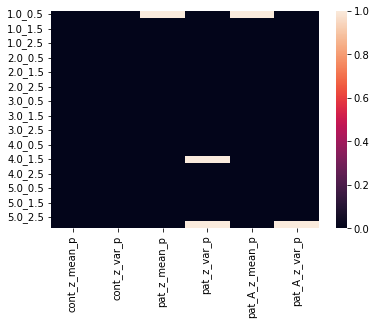

In [16]:
sns.heatmap(data[['cont_z_mean_p', 'cont_z_var_p', 'pat_z_mean_p', 'pat_z_var_p', 'pat_A_z_mean_p', 'pat_A_z_var_p']]<0.05)

<AxesSubplot:ylabel='Count'>

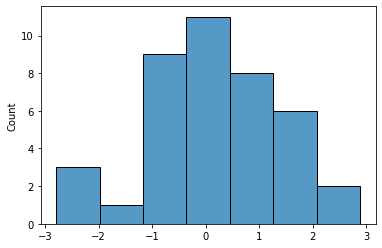

### Comparison of model performance with the orignal data
- so now the tricky part comes
- first, just compare the z-scores, which, ideally, should reflect the **pop** parameter across visits and subjects

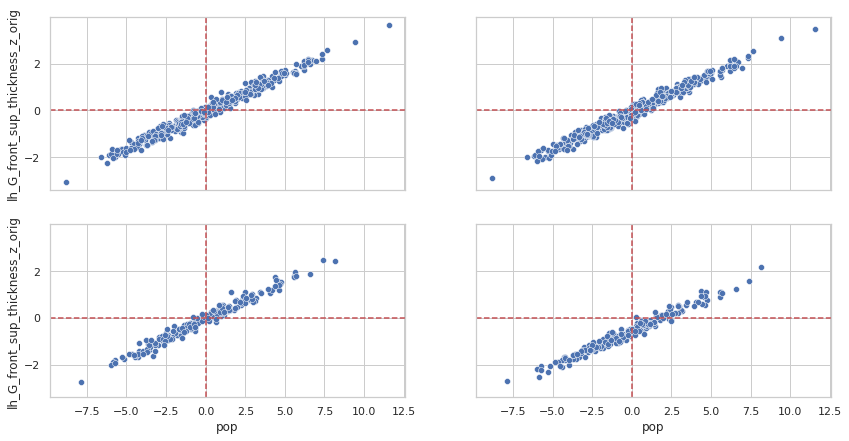

In [15]:
# Plot the z-scores
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(2,2, figsize=(14,7), sharex=True, sharey=True)
sns.scatterplot(data=v1_cont, x='pop', y=random_idp+'_z_orig', ax=ax[0,0])
sns.scatterplot(data=v2_cont, x='pop', y=random_idp+'_z_orig', ax=ax[0,1])
sns.scatterplot(data=v1_pat, x='pop', y=random_idp+'_z_orig', ax=ax[1,0])
sns.scatterplot(data=v2_pat, x='pop', y=random_idp+'_z_orig', ax=ax[1,1])
for i in range(2):
    for j in range(2):
        ax[i,j].axhline(y=0, color='r', linestyle='--')
        ax[i,j].axvline(x=0, color='r', linestyle='--')


### **Compute longitudinal statistics**

In [38]:
nom = ((v2_cont[random_idp+'_y'] - v2_cont[random_idp+'_yhat']) - (v1_cont[random_idp+'_y'] - v1_cont[random_idp+'_yhat']))
cont_var = ((v2_cont[random_idp+'_y'] - v2_cont[random_idp+'_yhat']) - (v1_cont[random_idp+'_y'] - v1_cont[random_idp+'_yhat'])).var()
cont_z = nom/np.sqrt(cont_var)

nom = ((v2_cont_cont_y - v2_cont_cont_yhat) - (v1_cont_cont_y - v1_cont_cont_yhat))
cont_cont_z = nom/np.sqrt(cont_var)

#nom = ((v2_pat[random_idp+'_y'] - v2_pat[random_idp+'_yhat']) - (v1_pat[random_idp+'_y'] - v1_pat[random_idp+'_yhat']))
#pat_z = nom/np.sqrt(cont_var)
